# **Accenture Data Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
content_path = '/content/drive/MyDrive/Accenture - Data Analytics and Visualization/Content.csv'
reaction_path = '/content/drive/MyDrive/Accenture - Data Analytics and Visualization/Reactions.csv'
reaction_types_path = '/content/drive/MyDrive/Accenture - Data Analytics and Visualization/ReactionTypes.csv'

# **File Paths**

In [ ]:
content = pd.read_csv(content_path)
reactions = pd.read_csv(reaction_path)
reaction_types = pd.read_csv(reaction_types_path)

# **Clean Copies**

In [ ]:
content_original = content.copy()
reactions_original = reactions.copy()
reaction_types_originals = reaction_types.copy()

# **Data Previews**

In [ ]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [ ]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [ ]:
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


# **Cleaning `content` Tables**

In [ ]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


## **Drop Irrelavant Columns: `Unnamed: 0`, `URL,`User ID`**

This columns don't provide the kind of insights that we're looking to share with and find for the client therefore they can be removed.

In [ ]:
content = content.drop(columns=['Unnamed: 0', 'URL','User ID'])

In [ ]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


- no missing data

## **Check for and Change Duplicates**

In [ ]:
content['Type'].value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Type, dtype: int64

- 4 different types of content: photo, video, GIF and audio

In [ ]:
content['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

- many different Categories of content, we need to replace some of the names becasue they mean the same thing but are listed with slight spelling variations

These are the different spelling variations that need to be made equal to one another.

technology -- "technology", Technology

animals -- "animals", Animals

healthy eating -- Healthy Eating,

science -- "science",Science

fitness -- Fitnes

cooking -- "cooking"

soccer -- "soccer", Soccer

tennis -- "tennis"

education -- Education

dogs -- "dogs"

studying -- "studying", Studying

veganism -- "veganism", Veganism

public speaking -- "public speaking", Public Speaking

In [ ]:
content['Category'] = content['Category'].str.replace('"','')
content['Category'] = content['Category'].str.lower()

In [ ]:
content['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

## **Change `Type` to `Content_Type`**
This makes it clear that there is a difference between `Type` in the content table and `Type` in the reactions or reactions_type tables

In [ ]:
content.rename(columns = {'Type':'Content_Type'}, inplace=True)
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    1000 non-null   object
 1   Content_Type  1000 non-null   object
 2   Category      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


# **Cleaning `reactions` Table**

In [ ]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [ ]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


## **Drop Irrelevant Columns: `Unnamed: 0` and `User ID`**


In [ ]:
reactions = reactions.drop(columns=['Unnamed: 0', 'User ID'])

In [ ]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    25553 non-null  object
dtypes: object(3)
memory usage: 599.0+ KB


- there's some missing data in the `Type` column

## **Drop Rows with Missing in `Type`**


In [ ]:
reactions = reactions.dropna(subset=['Type'])

## **Change `Datetime` to datetime Dtype**
Changing the `Datetime` column to the datetime data type allows us to use functionalities specific to datetime


In [ ]:
reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  24573 non-null  object        
 1   Type        24573 non-null  object        
 2   Datetime    24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


## **Change `Type` to `Reaction_Type`**
\

In [ ]:
reactions.rename(columns = {'Type':'Reaction_Type'}, inplace=True)
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


# **Cleaning `reaction_types` Table**

## **Drop `Unnamed: 0` Column**


In [ ]:
reaction_types = reaction_types.drop('Unnamed: 0', axis=1)

In [ ]:
reaction_types

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


## **Change `Type` to `Reaction_Type`**

In [ ]:
reaction_types.rename(columns = {'Type':'Reaction_Type'}, inplace=True)
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction_Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [ ]:
reaction_positive = reaction_types['Sentiment'] == 'positive'
len(reaction_types[reaction_positive])

9

#**Merging `content`, `reactions`, `reaction_types`**


- **many-to-one** -- means one of your datasets will have many rows in the merge column that repear the same values
- **many-to-many** -- multiple records in one table related to multiple records in another table


## **Merge `reactions` --> `content`**

- `reactions` (left) + `content` (right) = `reactions_content_merge`
- inner join on `Content ID` an column both table have

In [ ]:
reactions_content_merge = reactions.merge(content,how='inner', on=['Content ID'])
reactions_content_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content_Type   24573 non-null  object        
 4   Category       24573 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


## **Merge `reactions_content_merge` --> `reaction types`**

In [ ]:
merge_all = reactions_content_merge.merge(reaction_types, how='inner', on='Reaction_Type')


In [ ]:
merge_all.shape

(24573, 7)

In [ ]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content_Type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


# **Insights**

In [ ]:
merge_all['Content_Type'].value_counts()

photo    6589
video    6245
GIF      6079
audio    5660
Name: Content_Type, dtype: int64

In [ ]:
merge_all['Category'].nunique()

16

In [ ]:
merge_all.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [ ]:
top_categories = merge_all.groupby('Category').sum().sort_values(by=['Score'], ascending=False)

<ipython-input-48-cd1ad4a3863d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_categories = merge_all.groupby('Category').sum().sort_values(by=['Score'], ascending=False)


In [ ]:
top_categories

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


## **Questions**
1. What category has the most negative sentiment?

2. What category has the most positive sentiment?

3. what content_type is most popular?



### **What category has the most negative sentiment?**

In [ ]:
negatives = merge_all['Sentiment'] == 'negative'
positives = merge_all['Sentiment'] == 'positive'
negatives_df = merge_all[negatives]
negatives_df.groupby('Category').sum().sort_values(by=['Score'])

<ipython-input-50-c0827aae7b4d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  negatives_df.groupby('Category').sum().sort_values(by=['Score'])


,Score
Category,
public speaking,3162
dogs,3354
veganism,3402
education,3670
studying,3711
soccer,3714
fitness,3741
tennis,3743
technology,4090


In [ ]:
negatives_df[['Category','Score']]

,Category,Score
0,studying,0
1,studying,0
2,studying,0
3,healthy eating,0
4,healthy eating,0
...,...,...
18339,science,12
18340,science,12
18341,veganism,12
18342,technology,12


In [ ]:
negatives_df[['Category','Score']].groupby('Category').sum().sort_values(by=['Score'])


,Score
Category,
public speaking,3162
dogs,3354
veganism,3402
education,3670
studying,3711
soccer,3714
fitness,3741
tennis,3743
technology,4090


The findings are that of those categories that have a negative sentiment public speaking has the most negative sentiment as it has the lowest score.

### **What category has the most positive sentiment?**

In [ ]:
positives_df = merge_all[positives]
positives_df = positives_df[['Category','Score']]
positives_df.groupby('Category').sum().sort_values(by=['Score'], ascending=False)


,Score
Category,
animals,63228
science,60246
healthy eating,59284
technology,58628
culture,56325
food,56286
travel,55005
cooking,54907
soccer,48809


Within the data that has the label of positive sentiment the "animals" category has the highest scores and is therefore has the most positive sentiment.

In [ ]:
#count of positives and negatives
print(len(merge_all[negatives]), len(merge_all[positives]))

7695 13807


In [ ]:
#change year data type
merge_all['year'] = pd.DatetimeIndex(merge_all['Datetime']).year
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content_Type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
 7   year           24573 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.7+ MB


In [ ]:
#change year data type
merge_all['month'] = pd.DatetimeIndex(merge_all['Datetime']).month
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content_Type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
 7   year           24573 non-null  int64         
 8   month          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [ ]:
import calendar

In [ ]:
merge_all['month'] = merge_all['month'].apply(lambda x: calendar.month_name[x])

In [ ]:
#create dataframes for each year
year_2020_df = merge_all[merge_all['year'] == 2020]
year_2021_df = merge_all[merge_all['year'] == 2021]

In [ ]:
year_2021_df.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score,year,month
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021,January
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0,2021,April
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,2021,March
5,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-14 07:21:32,video,dogs,negative,0,2021,January
6,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-13 23:35:56,video,dogs,negative,0,2021,January


In [ ]:
year_2021_df['Sentiment'].value_counts()

positive    6360
negative    3533
neutral     1400
Name: Sentiment, dtype: int64

In [ ]:
year_2020_df['Sentiment'].value_counts()

positive    7447
negative    4162
neutral     1671
Name: Sentiment, dtype: int64

In [ ]:
merge_all['Content_Type'].value_counts()

photo    6589
video    6245
GIF      6079
audio    5660
Name: Content_Type, dtype: int64

In [ ]:
year_2021_df.groupby('Category').sum().sort_values(by=['Score'], ascending=False)

<ipython-input-64-5acb6e7910da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_2021_df.groupby('Category').sum().sort_values(by=['Score'], ascending=False)


,Score,year
Category,,
animals,35019,1788585
technology,32916,1632968
science,31953,1628926
culture,31398,1594569
food,31045,1602653
healthy eating,30959,1562233
travel,29827,1505645
cooking,29594,1548086
education,27976,1378322


### **what content_type is most popular?**

In [ ]:
popular = merge_all.groupby(['Content_Type']).sum().sort_values(by=['Score'], ascending=False)
popular

<ipython-input-65-6842397ceb3f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popular = merge_all.groupby(['Content_Type']).sum().sort_values(by=['Score'], ascending=False)


,Score,year
Content_Type,,
photo,262838,13312825
video,246463,12617690
GIF,238217,12282416
audio,226127,11435822


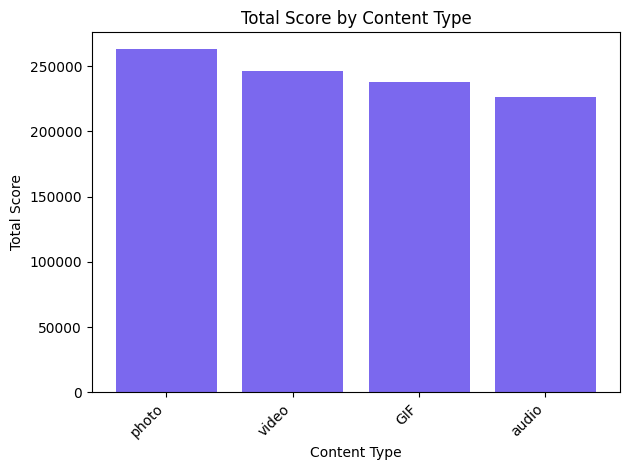

In [ ]:


# Assuming you have already calculated the 'popular' DataFrame
# popular = merge_all.groupby(['Content_Type']).sum().sort_values(by=['Score'], ascending=False)

# Create a bar graph using the 'popular' DataFrame
plt.bar(popular.index, popular['Score'],color='#7B68EE')

# Add labels and title
plt.xlabel('Content Type')
plt.ylabel('Total Score')
plt.title('Total Score by Content Type')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


A data visualization was used to determint that photo are the most popular content although most of the contents have total scores which are pretty similar.

- data is only from the years 2020 and 2021
- scores are higher in 2020 and 2021

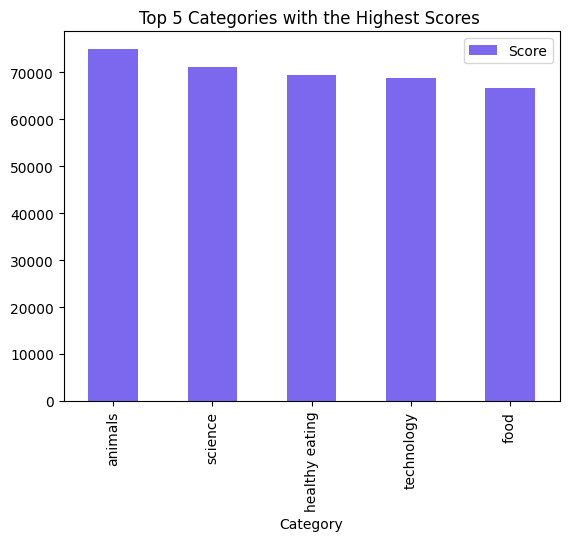

In [ ]:
top_categories[:5].plot(kind='bar', color='#7B68EE');
plt.title("Top 5 Categories with the Highest Scores ");

In [ ]:
#negatives = merge_all.groupby(['Category','Sentiment']).sum()
#negatives #doesnt answer my question but close

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


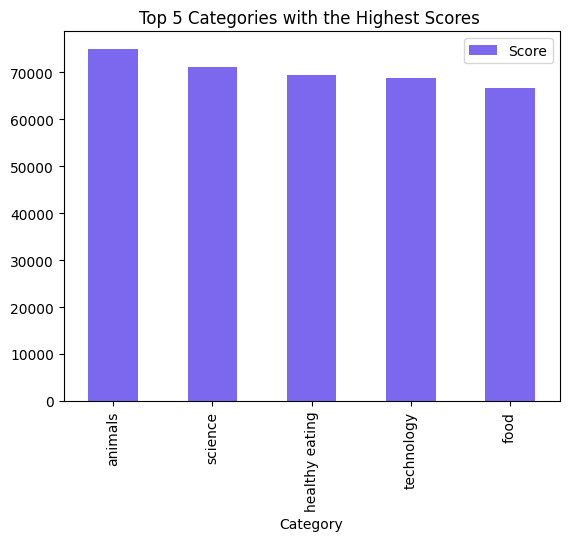

In [ ]:
top_categories[:5].plot(kind='bar', color='#7B68EE');
plt.title("Top 5 Categories with the Highest Scores ");

# **Exporting Data as .csv**

In [ ]:
merge_all.to_csv(r'/content/drive/MyDrive/Accenture - Data Analytics and Visualization/cleaned_data.csv',index=False)